### Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataset

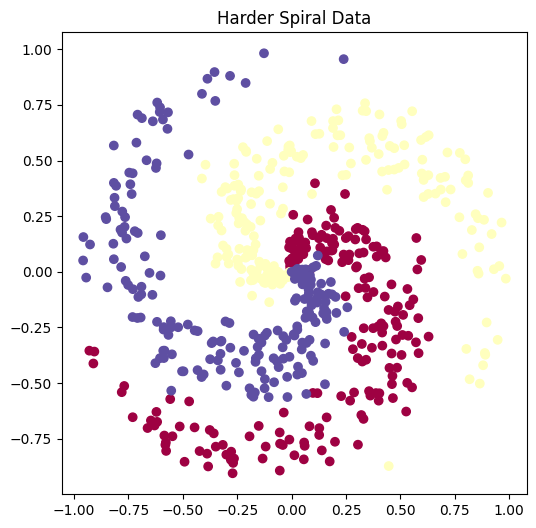

In [76]:
def generate_harder_spiral_data(points_per_class=200, noise=0.4, num_classes=3):
    N = points_per_class  # points per class
    D = 2                 # input dimension
    K = num_classes       # number of classes
    X = np.zeros((N*K,D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

# Generate data
X, y = generate_harder_spiral_data()

# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
plt.title('Harder Spiral Data')
plt.show()


In [77]:
X     # checking input features

array([[-0.00000000e+00,  0.00000000e+00],
       [ 6.18356709e-04,  4.98693519e-03],
       [ 2.58792940e-03,  9.71134243e-03],
       ...,
       [-1.27062715e-01,  9.81761464e-01],
       [-8.17342823e-01,  5.67384976e-01],
       [-7.08053811e-01,  7.06158482e-01]])

**Checking Input:** We have two continious input features

In [78]:
y   # Checking output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Checking Output:** It contain 3 categories

In [79]:
# Scale inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
# One-hot encode targets
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)

In [81]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, train_size=0.8,stratify=y,random_state=700)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 2), (120, 2), (480, 3), (120, 3))

### Visualizations

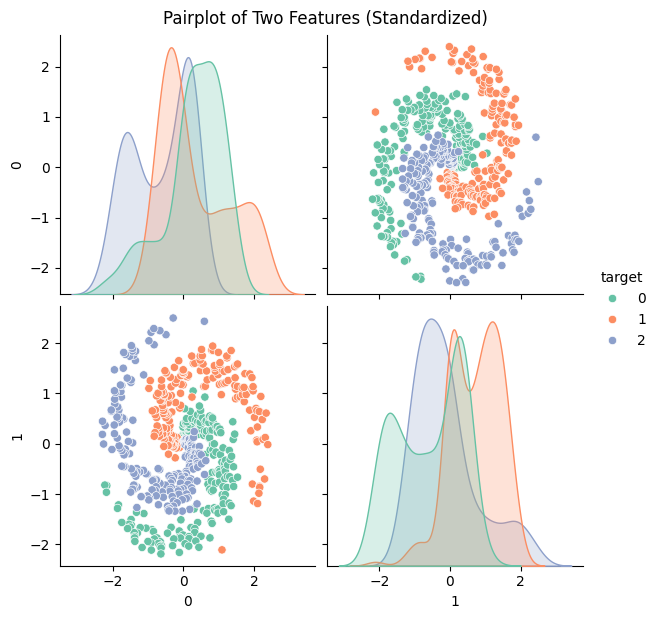

In [83]:
df_plot = pd.DataFrame(X_scaled)
df_plot['target'] = y
sns.pairplot(df_plot, hue='target', palette='Set2', height=3)
plt.suptitle("Pairplot of Two Features (Standardized)", y=1.02)
plt.show()

## Baseline Model : No Hidden Layer

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
-----------------------------------------------------------------
Accuracy (Baseline Model - No Hidden Layer): 0.6
-----------------------------------------------------------------


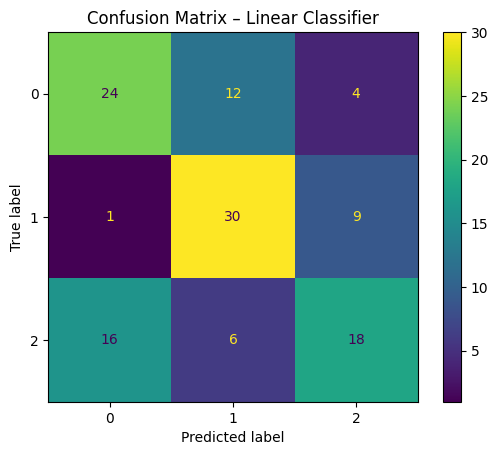

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

model_linear = Sequential([InputLayer(shape=(2,)),
                           Dense(3, activation='softmax')])

model_linear.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_linear.summary()

history_linear = model_linear.fit(X_train, y_train, epochs=300,validation_split=0.2, verbose=0,batch_size=70)

# Evaluation
y_pred_linear = np.argmax(model_linear.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("-----------------------------------------------------------------")
print("Accuracy (Baseline Model - No Hidden Layer):", accuracy_score(y_true, y_pred_linear))
print("-----------------------------------------------------------------")

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred_linear)).plot()
plt.title("Confusion Matrix – Linear Classifier")
plt.show()

### Decision Boundry - Baseline Model

3508/3508 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


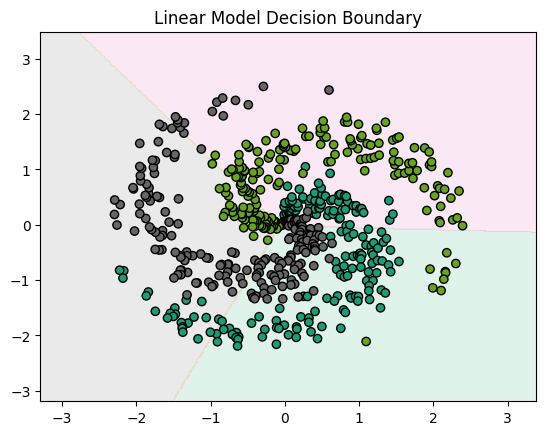

In [101]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    preds = np.argmax(probs, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.4, cmap='Pastel2')
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', cmap='Dark2')
    plt.title(title)
    plt.show()

  # Decision boundaries
plot_decision_boundary(model_linear, X_scaled, y_cat, "Linear Model Decision Boundary")

### Learning Curve - Baseline Model

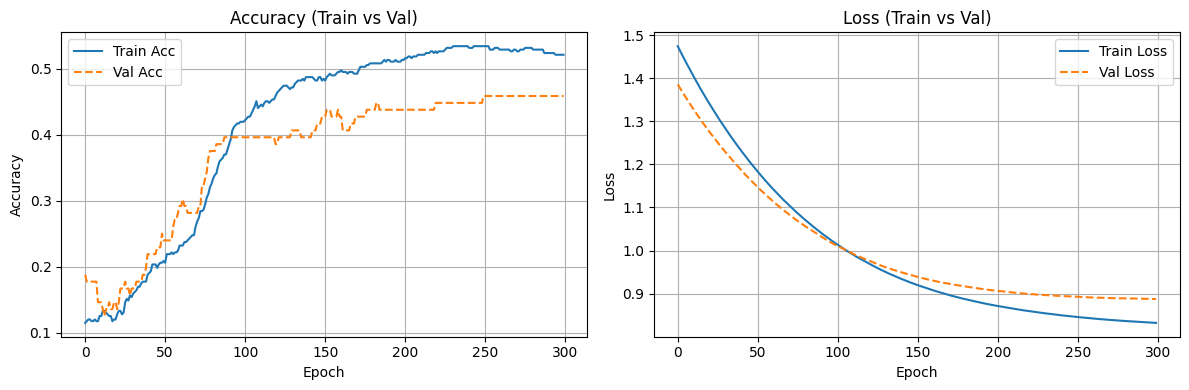

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_linear.history['accuracy'], label='Train Acc')
axs[0].plot(history_linear.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_linear.history['loss'], label='Train Loss')
axs[1].plot(history_linear.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Model Evaluation (Overfitting / Underfitting)

In [103]:
train_loss, train_accuracy = model_linear.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_linear.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.506
✅ Test Accuracy: 0.600

✅ Train Loss: 0.8431
✅ Test Loss: 0.7394


**Underfitting**: The baseline model is undertifitted it does not perform both on Training and Test Data, as shown by learning curve and model evaluation.

## MLP (Two Hidden Layers)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167 (668.00 B)

 Trainable params: 167 (668.00 B)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
-------------------------------------------------------------------------
Accuracy - MLP (Two Hidden Layers)): 0.975
-------------------------------------------------------------------------


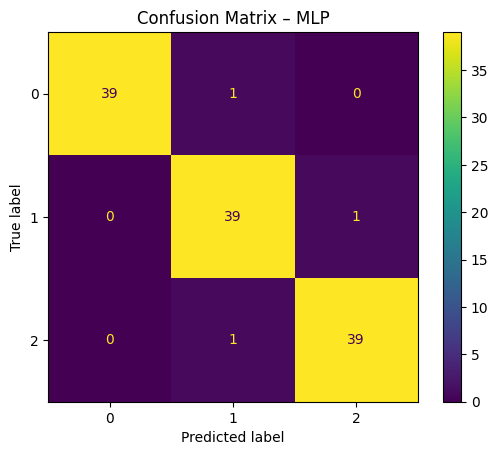

In [104]:
model_mlp = Sequential([InputLayer(shape=(2,)),
                        Dense(12, activation='relu'),
                        Dense(8, activation='relu'),
                        Dense(3, activation='softmax')
                        ])

model_mlp.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_mlp.summary()

history_mlp = model_mlp.fit(X_train, y_train,validation_split=0.2,epochs=300, verbose=0,batch_size=70)
y_pred_mlp = np.argmax(model_mlp.predict(X_test), axis=1)

print("-------------------------------------------------------------------------")
print("Accuracy - MLP (Two Hidden Layers)):", accuracy_score(y_true, y_pred_mlp))
print("-------------------------------------------------------------------------")

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred_mlp)).plot()
plt.title("Confusion Matrix – MLP")
plt.show()

### Decision Boundry - MLP (Two Hidden Layers)

3508/3508 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


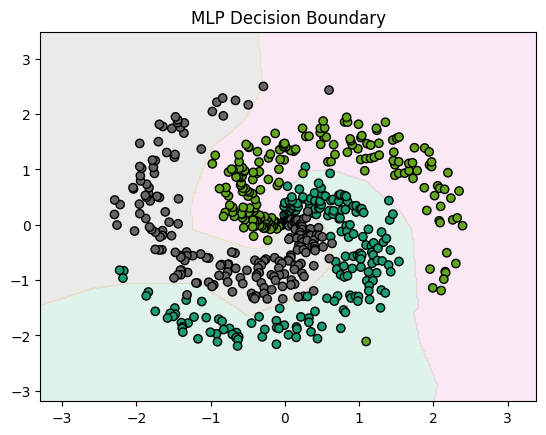

In [105]:
plot_decision_boundary(model_mlp, X_scaled, y_cat, "MLP Decision Boundary")

### Learning Curve - MLP (Two Hidden Layers)

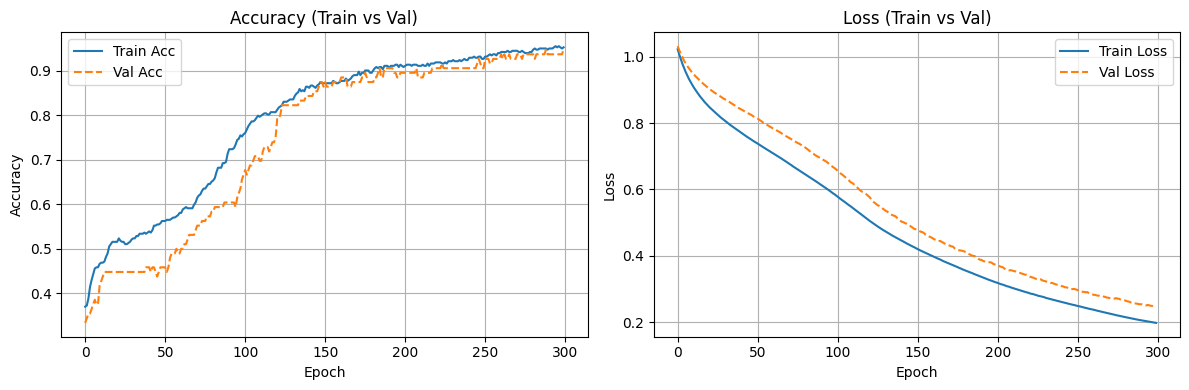

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_mlp.history['accuracy'], label='Train Acc')
axs[0].plot(history_mlp.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_mlp.history['loss'], label='Train Loss')
axs[1].plot(history_mlp.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Model Evaluation (Overfitting / Underfitting)

In [107]:
train_loss, train_accuracy = model_mlp.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.952
✅ Test Accuracy: 0.975

✅ Train Loss: 0.2064
✅ Test Loss: 0.2521


**MLP (Two Hidden Layer):** The model is performing well both on Training and Test Data set, so no overfitting or underfitting was observed.

## MLP (Controlled Earlystopping) - Epochs = 500

In [109]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model_mlp_1 = Sequential([InputLayer(shape=(2,)),
                        Dense(12, activation='relu'),
                        Dense(8, activation='relu'),
                        Dense(3, activation='softmax')
                        ])

model_mlp_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_mlp_1.summary()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,  # Recover best weights, not just stop
    verbose=1)

checkpoint = ModelCheckpoint(
    'best_model_spiral_data.keras',  # File name (SavedModel format)
    monitor='val_loss',
    save_best_only=True,
    verbose=1)

history_mlp_1 = model_mlp_1.fit(X_train, y_train,
                            validation_split=0.2,epochs=500,
                            callbacks=[early_stop, checkpoint],
                            verbose=2,batch_size=70)

y_pred_mlp_1 = np.argmax(model_mlp.predict(X_test), axis=1)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167 (668.00 B)

 Trainable params: 167 (668.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500

Epoch 1: val_loss improved from inf to 1.10926, saving model to best_model_spiral_data.keras
6/6 - 1s - 243ms/step - accuracy: 0.3932 - loss: 1.1202 - val_accuracy: 0.3958 - val_loss: 1.1093
Epoch 2/500

Epoch 2: val_loss improved from 1.10926 to 1.09840, saving model to best_model_spiral_data.keras
6/6 - 0s - 74ms/step - accuracy: 0.4193 - loss: 1.1074 - val_accuracy: 0.4062 - val_loss: 1.0984
Epoch 3/500

Epoch 3: val_loss improved from 1.09840 to 1.08896, saving model to best_model_spiral_data.keras
6/6 - 0s - 40ms/step - accuracy: 0.4349 - loss: 1.0959 - val_accuracy: 0.4271 - val_loss: 1.0890
Epoch 4/500

Epoch 4: val_loss improved from 1.08896 to 1.08053, saving model to best_model_spiral_data.keras
6/6 - 0s - 21ms/step - accuracy: 0.4688 - loss: 1.0849 - val_accuracy: 0.4583 - val_loss: 1.0805
Epoch 5/500

Epoch 5: val_loss improved from 1.08053 to 1.07219, saving model to best_model_spiral_data.keras
6/6 - 0s - 30ms/step - accuracy: 0.4766 - loss: 1.0743 - val_accu

-----------------------------------------------------------------
MLP (Controlled Earlystopping): 0.975
-----------------------------------------------------------------


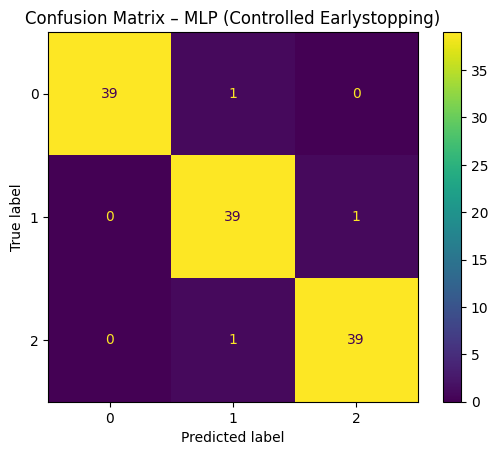

In [110]:
print("-----------------------------------------------------------------")
print("MLP (Controlled Earlystopping):", accuracy_score(y_true, y_pred_mlp_1))
print("-----------------------------------------------------------------")

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred_mlp_1)).plot()
plt.title("Confusion Matrix – MLP (Controlled Earlystopping)")
plt.show()

Decision Boundry - MLP (Controlled Earlystopping)

3508/3508 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


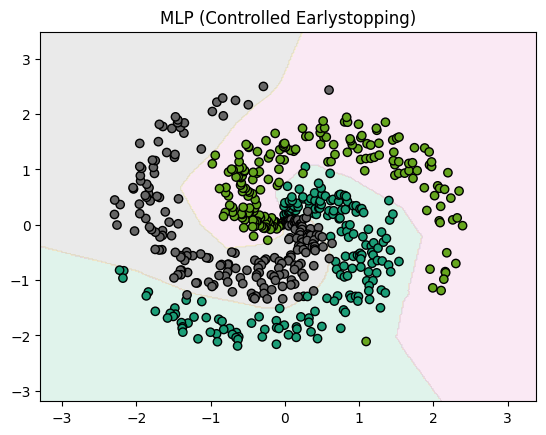

In [112]:
plot_decision_boundary(model_mlp_1, X_scaled, y_cat, "MLP (Controlled Earlystopping)")

### Learning Curve - MLP (Controlled Earlystopping)

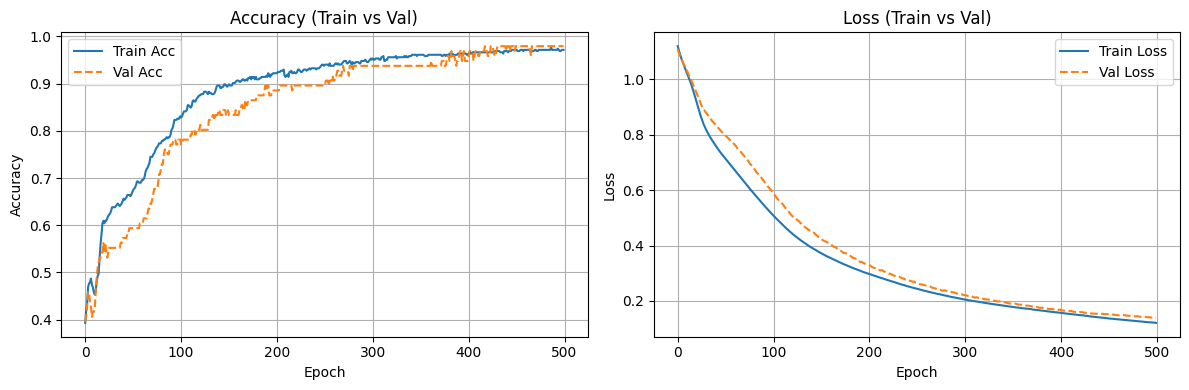

In [113]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_mlp_1.history['accuracy'], label='Train Acc')
axs[0].plot(history_mlp_1.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_mlp_1.history['loss'], label='Train Loss')
axs[1].plot(history_mlp_1.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Model Evaluation (Overfiiting / Underfitting)

In [115]:
train_loss, train_accuracy = model_mlp_1.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_mlp_1.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.3f}")
print(f"✅ Test Loss: {test_loss:.3f}")

✅ Train Accuracy: 0.973
✅ Test Accuracy: 0.992

✅ Train Loss: 0.124
✅ Test Loss: 0.137


**MLP (Controlled Earlystopping):** Model is performing excellent with both Train and test data, so no overfitting and underfitting. Also Earlystop checkpoint avoided overfitting of the model.

## Analysis

**Addition of More Neurons:**

*  **Positive Impact**: More neurons give the network greater ability to learn complex patterns, relationships, and non-linearities in the data. Therefore leads to higher accuracy.

*   **Negative Impact:** Too many neurons can cause the model to memorize the training data, leading to poor performance on unseen data (Overfitting) and increased computation cost (as more neuron means more parameters




**Addition of More Hidden Layers:**

*   **Positive Impact:** Adding more hidden layers to a vanilla neural network  transforms it from a shallow to a deep architecture, enhancing the ability to learn more complex representations.Some problems are naturally hierarchical (e.g., language, vision), and deeper networks can capture such structure better.
*   **Negative Impact**: Longer Training Time (More layers = more parameters = slower training and higher computational cost) and Overfitting Risk(Deep networks are powerful and can easily overfit if the training data is small or noisy)



**Q1: How did you decide the number of hidden layers and neurons?**

**Ans:** A general rule of thump is the more complex the patterns or data types, the more hidden layers may be need. In our case the data is in tabular form so 1-3 hidden layers are enough, if data consisted of images,text or time series then more hidden layers can be used.


**Q2: How did different learning rates affect the results?**

**Ans:** I started from very small learning rate 0.00001 uptill 0.5, it was noted that by increasing learning rate, accuracy of the model increases but uptill certain learning rate then it decreases. The reason is very small learning rate can have false local minima and very large learning rate with overshoot and will not reach global minima.

**Q3: Did you encounter overfitting or underfitting? How did you deal with it?**

**Ans:** When epochs was set to 500, chances were we might experience overfitting, inorder to encounter it, we use earlystop and checkpoint.


**Q4: If you had more time, how would you further improve the model?**

**Ans:** If I had more time I would implement  similar functionality as we use in sklearn library that is GridsearchCV and best estimator ( so that best learning rate, batch_size, optimizer etc can be selected) but in deep learning we are working on keras library. I tried to do it, but due to time constraint wasn't able to do it.


## Summary

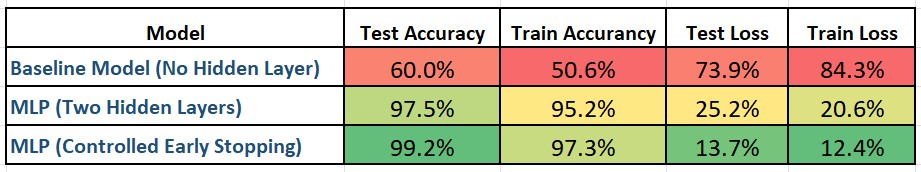

**Conclusion:** The above table shows that **MLP (Controlled Earlystopping)** has performed best both on test and test accuracy and has minimum Test and Train Loss.